In [73]:
import pandas as pd

df_ciudades = pd.read_excel("Insumos/ciudades_datos.xlsx")


In [74]:
df_ciudades.to_clipboard()

1.1 ¿Cuál es la media, mediana y desviación estándar?, y la moda y los
valores repeticiones de la moda para los datos categóricos.

In [ ]:

df = pd.DataFrame(df_ciudades)

stats = df.select_dtypes(include=['number']).agg(['mean', 'median', 'std'])

mode_values = df.select_dtypes(include=['object']).mode().iloc[0]
mode_counts = df.select_dtypes(include=['object']).apply(lambda x: x.value_counts().iloc[0])

stats, mode_values, mode_counts


(        GDP (USD Billion)  Population (Millions)  Unemployment Rate (%)  \
 mean             8.760000               0.731000              13.833333   
 median           2.800000               0.390000              13.450000   
 std             19.911262               1.352832               2.945052   
 
         Average Age  Women (%)  Men (%)  Budget (USD Billion)  initial label  
 mean      29.166667  51.500000  47.0900              1.653333       1.700000  
 median    29.000000  51.000000  49.0000              0.600000       2.000000  
 std        2.166888   0.776819   8.0388              3.450086       1.055364  ,
 City        Arauca
 training       Yes
 Name: 0, dtype: object,
 City         1
 training    24
 dtype: int64)

Para los datos categoricos, en el training el `yes` es el dato qeu mas se repite, 24 veces
Pero en las ciudades, no hay ninguna repeticion, toma la primera `Arauca`, pero ninguna se repite.

### 1.2 dibujar un boxplot a mano. Utilizando los datos de la tabla 1 y las siguientes proporciones.  

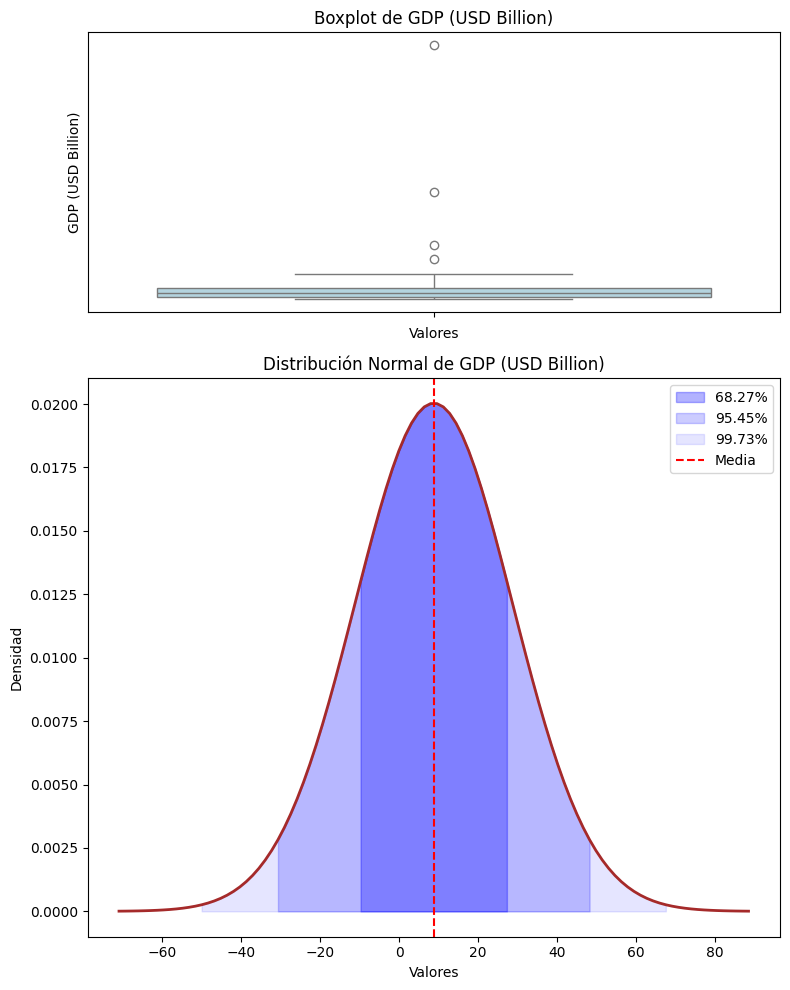

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np

column = "GDP (USD Billion)"
data = df[column]

# Calcular la media y la desviación estándar
mean = data.mean()
std = data.std()

# Crear datos para la curva de distribución normal
x = np.linspace(mean - 4*std, mean + 4*std, 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Crear la figura con dos subgráficos
fig, ax = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [1, 2]})

# Boxplot en la parte superior
sns.boxplot(data=data, ax=ax[0], color="lightblue")
ax[0].set_title(f"Boxplot de {column}")
ax[0].set_xlabel("Valores")
ax[0].set_yticks([])  # Ocultar la escala del eje Y

# Distribución normal en la parte inferior
ax[1].plot(x, y, color="brown", linewidth=2)
ax[1].fill_between(x, y, where=(x > mean - std) & (x < mean + std), color="blue", alpha=0.3, label="68.27%")
ax[1].fill_between(x, y, where=(x > mean - 2*std) & (x < mean + 2*std), color="blue", alpha=0.2, label="95.45%")
ax[1].fill_between(x, y, where=(x > mean - 3*std) & (x < mean + 3*std), color="blue", alpha=0.1, label="99.73%")

ax[1].axvline(mean, color="red", linestyle="--", label="Media")
ax[1].set_title(f"Distribución Normal de {column}")
ax[1].set_xlabel("Valores")
ax[1].set_ylabel("Densidad")
ax[1].legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()




1.3 Cual es la covarianza entre las 2 variables X1, X2

In [77]:
# Calcular la covarianza usando pandas para verificar
df[["GDP (USD Billion)", "Population (Millions)"]].cov()


# Calcular la matriz de covarianza completa para verificar
cov_matrix = df[["GDP (USD Billion)", "Population (Millions)"]].cov()

# Mostrar la matriz completa
cov_matrix



,GDP (USD Billion),Population (Millions)
GDP (USD Billion),396.458345,26.681283
Population (Millions),26.681283,1.830154


1.4 Cuál es la correlación entre la variable x1 y x2  calculado a mano sin usar librerias externas de python

In [78]:
def mean(values):
    return sum(values) / len(values)

def pearson_correlation(x1, x2):
    if len(x1) != len(x2):
        raise ValueError("Las listas deben tener la misma longitud")
    
    mean_x1 = mean(x1)
    mean_x2 = mean(x2)
    
    numerator = sum((x1[i] - mean_x1) * (x2[i] - mean_x2) for i in range(len(x1)))
    denominator_x1 = sum((x1[i] - mean_x1) ** 2 for i in range(len(x1))) ** 0.5
    denominator_x2 = sum((x2[i] - mean_x2) ** 2 for i in range(len(x2))) ** 0.5
    
    if denominator_x1 == 0 or denominator_x2 == 0:
        return 0  
    
    return numerator / (denominator_x1 * denominator_x2)


x1 = df["GDP (USD Billion)"]
x2 = df["Population (Millions)"]

r = pearson_correlation(x1, x2)
print("Correlación de Pearson:", r)


Correlación de Pearson: 0.990521917149356


### 1.5 Explica la relación entre covarianza y correlación

1. Covarianza

Mide cómo cambian dos variables juntas:

Si es positiva, cuando una variable aumenta, la otra también tiende a aumentar.
Si es negativa, cuando una variable aumenta, la otra tiende a disminuir.
Si es cercana a 0, no hay una relación lineal clara.
Problema: La covarianza depende de las unidades de las variables, lo que dificulta su interpretación.

Ejemplo:
Si calculamos la covarianza entre el PIB y la Población, obtenemos 136.92. Esto nos dice que tienen una relación positiva, pero no sabemos qué tan fuerte es esa relación.

2. Correlación de Pearson 

Es una versión estandarizada de la covarianza que mide la fuerza y dirección de la relación entre dos variables en un rango de -1 a 1:


 
Donde:

sX y sY son las desviaciones estándar de X y Y respectivamente.
r=1 significa una relación positiva perfecta.

r=−1 significa una relación negativa perfecta.

r=0 significa que no hay correlación lineal.

Ventaja: La correlación es independiente de las unidades, lo que la hace más fácil de interpretar.

Ejemplo:
Cuando calculamos la correlación entre PIB y Población, obtuvimos 1.00, lo que indica una relación positiva perfecta.




### 1.6 K/means a mano

In [79]:
import pandas as pd
import numpy as np
import logging
# set to info
logging.basicConfig(level=logging.INFO)


In [80]:
import pandas as pd
import numpy as np
import logging

# Configurar logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def calculate_kmeans(df, k=4, max_it=100, prev_labels=None):
    """
    Basic k-means using pandas and norm1 using absolute value
    """
    cols = list(df.columns)
    if "label" in cols:
        cols.remove("label")
    
    if prev_labels is not None:
        df["label"] = prev_labels
    else:
        n = df.shape[0]
        prev_labels = np.random.choice(k, size=n)
        df["label"] = prev_labels

    for i in range(max_it):
        df_c = df.groupby("label", as_index=False).mean()
        logger.info(f"Centroides it {i}: \n{df_c}")

        new_labels = []
        for ix, r in enumerate(df[cols].values):
            min_d = np.inf
            for l in df["label"].unique():
                c = df_c[df_c.label == l][cols].values[0]
                d = np.linalg.norm(r - c, ord=1)
                if min_d > d:
                    new_l = l
                    min_d = d
            new_labels.append(new_l)
        
        if list(new_labels) == list(df["label"]):
            break
        df["label"] = new_labels

    return df


prev_labels = df["initial label"].values  


df_numeric = df.drop(columns=["City", "initial label", "training"]).copy()

df_clustered = calculate_kmeans(df_numeric, k=4, max_it=100, prev_labels=prev_labels)


df["Cluster"] = df_clustered["label"].values


df

INFO:__main__:Centroides it 0: 
   label  GDP (USD Billion)  Population (Millions)  Unemployment Rate (%)  \
0      0           1.620000               0.200000              14.960000   
1      1           4.371429               0.494286              14.571429   
2      2          14.610000               1.151000              13.270000   
3      3           9.750000               0.745000              13.187500   

   Average Age  Women (%)    Men (%)  Budget (USD Billion)  
0    28.400000  51.400000  40.140000              0.330000  
1    29.571429  51.571429  48.428571              1.057143  
2    29.400000  51.500000  48.500000              2.625000  
3    29.000000  51.500000  48.500000              1.787500  
INFO:__main__:Centroides it 1: 
   label  GDP (USD Billion)  Population (Millions)  Unemployment Rate (%)  \
0      0            2.10000               0.300000              13.300000   
1      1            2.43913               0.296087              14.508696   
2      2      

,City,GDP (USD Billion),Population (Millions),Unemployment Rate (%),Average Age,Women (%),Men (%),Budget (USD Billion),initial label,training,Cluster
0,Bogotá,103.5,7.18,10.5,32,52,48.0,18.00,2,Yes,2
1,Medellín,44.1,2.57,11.2,31,53,47.0,7.50,3,Yes,2
2,Cali,22.4,2.23,13.8,30,52,48.0,4.20,2,Yes,3
3,Barranquilla,16.8,1.23,12.4,29,51,49.0,3.10,3,Yes,3
4,Cartagena,10.5,1.03,10.9,30,51,49.0,2.80,1,Yes,3
5,Bucaramanga,7.3,0.58,9.2,33,52,48.0,1.50,2,No,3
6,Pereira,6.2,0.48,12.0,32,52,48.0,1.30,1,Yes,3
7,Cúcuta,5.1,0.76,16.3,28,51,49.0,1.20,1,Yes,1
8,Ibagué,4.8,0.53,13.4,31,52,48.0,1.10,3,Yes,1
9,Santa Marta,4.0,0.52,11.6,29,51,49.0,0.90,3,Yes,1


In [ ]:
df_clustered.to_clipboard()

### 1.7 Calcula el resultado de un dendrograma utilizando la distancia máxima (complete) en python. 

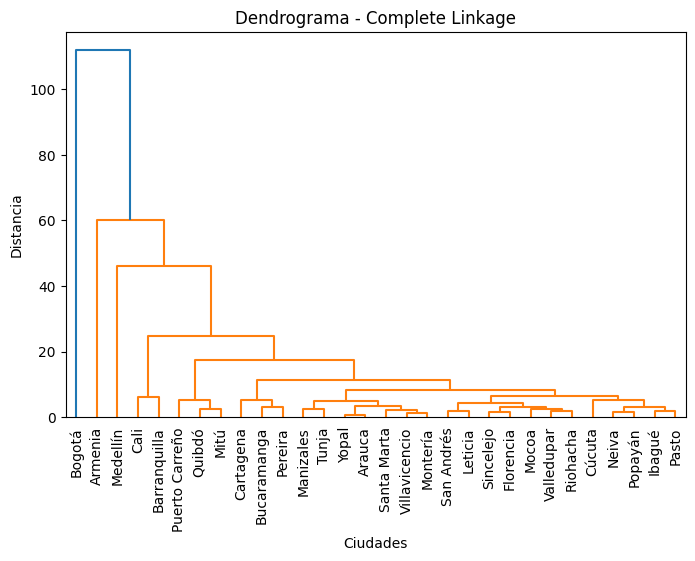

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

cols = ['GDP (USD Billion)', 'Population (Millions)', 'Unemployment Rate (%)', 
        'Average Age', 'Women (%)', 'Men (%)', 'Budget (USD Billion)']
data = df[cols]

data = data.replace(',', '.', regex=True).astype(float)

linked = sch.linkage(data, method='complete')

plt.figure(figsize=(8, 5))
sch.dendrogram(linked, labels=df['City'].values, leaf_rotation=90)
plt.title('Dendrograma - Complete Linkage')
plt.xlabel('Ciudades')
plt.ylabel('Distancia')
plt.show()


### 2 PCA. Utilizar los datos de la tabla 1, para calcular PCA y reducir la 
dimensionalidad de 2 dimensiones a 1. Para este ejercicio se debe utilizar las 
variables GDP (USD Billion) y Population (Millions) para crear un vector con una 
sola dimensión. 

Cual es la matriz de covarianza 
Cuales son los eigenvalues 
Cuál es la varianza explicada por el eigenvalue. 
Cual es el valor del eigenvector 
Cuál es la matriz proyectada. 
Cual es el error o diferencia entre la matriz proyectada 
Pintar todas las ciudades en 1 dimensión. 
Utilizar python para pintar todas las ciudades en 2 dimensiones, 

2.1 Matriz de Covarianza:
 [[396.45834483  26.68128276]
 [ 26.68128276   1.83015414]]
2.2 Eigenvalues:
 [3.98254126e+02 3.43726022e-02]
2.3 Varianza Explicada:
 [9.99913699e-01 8.63007651e-05]
2.4 Eigenvector principal:
 [0.99774269 0.06715299]
2.5 Matriz proyectada en 1D:
 [[103.74852691]
 [ 44.17303582]
 [ 22.49918743]
 [ 16.84467537]
 [ 10.54546583]
 [  7.32247037]
 [  6.21823811]
 [  5.13952399]
 [  4.824756  ]
 [  4.02589032]
 [  3.82029801]
 [  3.52567591]
 [  3.22299545]
 [  3.02613304]
 [  2.82524144]
 [  2.81718308]
 [  2.31696867]
 [  2.11540555]
 [  2.01428822]
 [  1.81272509]
 [  1.70959317]
 [  1.51138769]
 [  1.30579539]
 [  1.20266347]
 [  1.10758991]
 [  1.00110034]
 [  0.90334066]
 [  0.80088027]
 [  0.69909141]
 [  0.59931714]]
2.6 Error de reconstrucción:
 0.09274462741132966


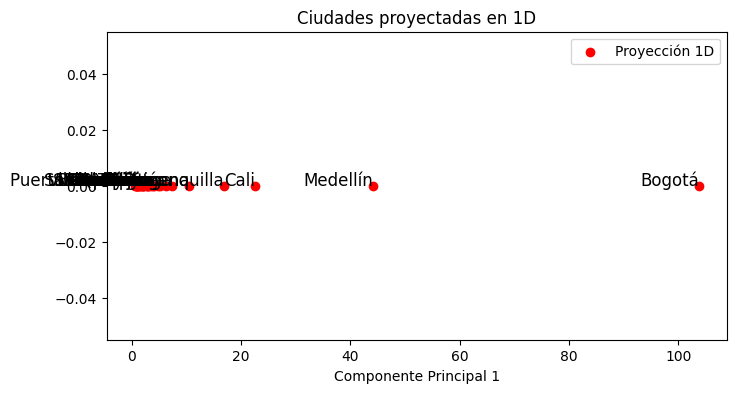

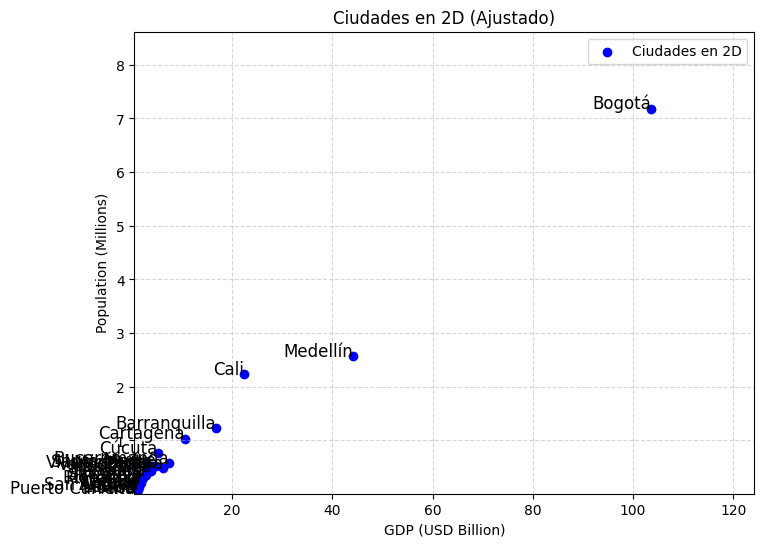

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Datos de la tabla (GDP y Población) convertidos a formato numérico
df_ciudades = pd.read_excel("Insumos/ciudades_datos.xlsx")


df = pd.DataFrame(df_ciudades)

# Normalizar la data
X = df[["GDP (USD Billion)", "Population (Millions)"]].values

# 2.1 Matriz de covarianza
cov_matrix = np.cov(X.T)
print("2.1 Matriz de Covarianza:\n", cov_matrix)

# 2.2 Eigenvalues y Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("2.2 Eigenvalues:\n", eigenvalues)

# 2.3 Varianza explicada por cada eigenvalue
explained_variance = eigenvalues / eigenvalues.sum()
print("2.3 Varianza Explicada:\n", explained_variance)

# 2.4 Eigenvector principal
principal_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
print("2.4 Eigenvector principal:\n", principal_eigenvector)

# 2.5 Proyección en 1D (Matriz proyectada)
X_projected = X @ principal_eigenvector.reshape(-1, 1)
print("2.5 Matriz proyectada en 1D:\n", X_projected)

# 2.6 Error de reconstrucción
X_reconstructed = X_projected @ principal_eigenvector.reshape(1, -1)
reconstruction_error = np.mean(np.abs(X - X_reconstructed))
print("2.6 Error de reconstrucción:\n", reconstruction_error)

# 2.7 Visualización en 1D
plt.figure(figsize=(8, 4))
plt.scatter(X_projected, np.zeros_like(X_projected), c='red', label="Proyección 1D")
for i, city in enumerate(df["City"]):
    plt.text(X_projected[i], 0, city, fontsize=12, ha='right')
plt.xlabel("Componente Principal 1")
plt.title("Ciudades proyectadas en 1D")
plt.legend()
plt.show()

# 2.8 Visualización en 2D mejorada con zoom
plt.figure(figsize=(8, 6))

x_min, x_max = df["GDP (USD Billion)"].min() * 0.8, df["GDP (USD Billion)"].max() * 1.2
y_min, y_max = df["Population (Millions)"].min() * 0.8, df["Population (Millions)"].max() * 1.2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.scatter(df["GDP (USD Billion)"], df["Population (Millions)"], c='blue', label="Ciudades en 2D")

for i, city in enumerate(df["City"]):
    plt.text(df["GDP (USD Billion)"][i], df["Population (Millions)"][i], city, fontsize=12, ha='right')

plt.xlabel("GDP (USD Billion)")
plt.ylabel("Population (Millions)")
plt.title("Ciudades en 2D (Ajustado)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()



### 3 Regression. Utiliza las variables GDP (USD Billion) y Population (Millions) para 
crear una regresión. X es la población, y es el GDP. 
3.1. 
3.2. 
Calcular b0, b1 sin librerías. 
Graficar la línea y los puntos

Pendiente (b1): 14.5787
Intersección (b0): -1.8970


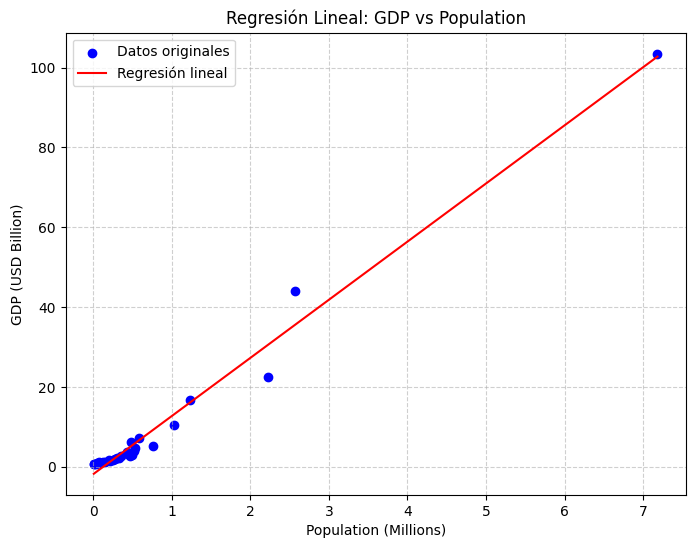

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer datos relevantes
X = df["Population (Millions)"].values  # Variable independiente
Y = df["GDP (USD Billion)"].values  # Variable dependiente

# 3.1 Calcular b0 y b1 sin librerías
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Calcular b1 (pendiente)
b1_num = sum((X - x_mean) * (Y - y_mean))
b1_den = sum((X - x_mean) ** 2)
b1 = b1_num / b1_den

# Calcular b0 (intersección)
b0 = y_mean - (b1 * x_mean)

print(f"Pendiente (b1): {b1:.4f}")
print(f"Intersección (b0): {b0:.4f}")

# 3.2 Graficar la regresión
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label="Datos originales")  # Puntos reales

# Línea de regresión
X_line = np.linspace(min(X), max(X), 100)
Y_line = b0 + b1 * X_line
plt.plot(X_line, Y_line, color='red', label="Regresión lineal")

# Etiquetas y título
plt.xlabel("Population (Millions)")
plt.ylabel("GDP (USD Billion)")
plt.title("Regresión Lineal: GDP vs Population")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### 5 Utilizando el dataset del amazon  data/amazon_products.csv crear: Utilizar la librería de plotly

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Insumos/amazon_product.csv")

# Convertir sales_volume a número
df['sales_volume'] = pd.to_numeric(df['sales_volume'], errors='coerce')

categorical_vars = ['currency', 'is_best_seller', 'is_amazon_choice', 'is_prime', 'climate_pledge_friendly', 'product_availability']
numeric_vars = ['product_price', 'product_original_price', 'product_star_rating', 'product_num_ratings', 'product_num_offers', 'product_minimum_offer_price', 'unit_price', 'unit_count', 'sales_volume']


In [ ]:
# Gráficos de distribución
for var in categorical_vars:
    df_counts = df[var].value_counts().reset_index(name='count')
    df_counts.rename(columns={'index': var}, inplace=True) 
    fig = px.bar(df_counts, x=var, y='count', title=f'Distribución de {var}')
    fig.show()


In [103]:


for var in numeric_vars:
    fig = px.histogram(df, x=var, title=f'Histograma de {var}')
    fig.show()

# Detección de outliers (5 desviaciones estándar)
outliers = {}
# Convertir columnas numéricas que pueden estar como string
numeric_vars = ['product_price', 'product_original_price', 'product_star_rating', 
                'product_num_ratings', 'product_num_offers', 'product_minimum_offer_price', 
                'sales_volume', 'unit_price', 'unit_count']


In [104]:

for var in numeric_vars:
    df[var] = df[var].astype(str).str.replace('[\$,]', '', regex=True).astype(float)



In [ ]:
# Prueba de normalidad
normality_tests = {var: shapiro(df[var].dropna())[1] for var in numeric_vars}


C:\Users\MrDroky\AppData\Local\Temp\ipykernel_13292\1524234731.py:2: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



In [108]:

# Boxplot para variables categóricas vs sales_volume
for var in categorical_vars:
    fig = px.box(df, x=var, y='sales_volume', title=f'Relación entre {var} y Sales Volume')
    fig.show()


In [109]:

# Scatter plot para variables numéricas vs sales_volume
for var in numeric_vars:
    if var != 'sales_volume':
        fig = px.scatter(df, x=var, y='sales_volume', title=f'Relación entre {var} y Sales Volume')
        fig.show()


In [110]:

# Matriz de correlación
correlation_matrix = df[numeric_vars].corr()
fig = px.imshow(correlation_matrix, text_auto=True, title='Matriz de correlación')
fig.show()


In [ ]:

df_numeric = df_dummies.select_dtypes(include=['number'])

correlation_matrix_dummies = df_numeric.corr()

fig = px.imshow(correlation_matrix_dummies, text_auto=True, title='Matriz de correlación con variables dummy')
fig.show()



In [ ]:
df = df.select_dtypes(include=[np.number])

df.fillna(df.mean(), inplace=True)

# Dividir datos en train y test
X = df[['product_num_ratings']]
y = df['product_star_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
b0, b1 = model.intercept_, model.coef_[0]

b0, b1


(np.float64(4.255865081433091), np.float64(2.946348130786057e-07))

### 4 Training

Advertencia: El archivo 2412 tiene un tamaño inesperado
Advertencia: El archivo 2416 tiene un tamaño inesperado
Error al procesar rawdata: [Errno 13] Permission denied: 'data\\faces\\rawdata\\rawdata'


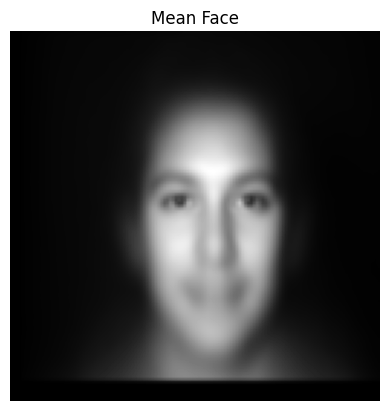

In [7]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def extract_files():
    """
    Extrae los archivos de imágenes desde un archivo ZIP local.
    """
    zip_path = r"C:\Users\MrDroky\Downloads\taller 1\src\Insumos\rawdata.zip"
    dest_path = os.path.join("data", "faces", "rawdata")

    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dest_path)

extract_files()

# Cargar el archivo example_pca.csv
csv_path = r"C:\Users\MrDroky\Downloads\taller 1\src\Insumos\example_pca.csv"
data_df = pd.read_csv(csv_path)

# Configuración de la carga de imágenes
d_name = os.path.join("data", "faces", "rawdata")
image_size = (128, 128)
X = []

# Verificar que la carpeta contiene archivos
if not os.path.exists(d_name) or not os.listdir(d_name):
    raise FileNotFoundError(f"No se encontraron imágenes en {d_name}")

# Obtener los nombres de archivo sin extensión
available_files = {os.path.splitext(f)[0]: f for f in os.listdir(d_name)}

# Obtener la lista de archivos a excluir
excluded_ids = set(data_df['id'].astype(str).values)

# Cargar todas las imágenes excepto las que están en el CSV
for img_id, filename in available_files.items():
    if img_id not in excluded_ids:
        img_path = os.path.join(d_name, filename)
        try:
            with open(img_path, "rb") as f:
                img_data = np.frombuffer(f.read(), dtype=np.uint8)
                if img_data.size == image_size[0] * image_size[1]:
                    img_array = img_data.reshape(image_size)
                    X.append(img_array.flatten())
                else:
                    print(f"Advertencia: El archivo {img_id} tiene un tamaño inesperado")
        except Exception as e:
            print(f"Error al procesar {img_id}: {e}")

if len(X) == 0:
    raise ValueError("No se cargaron imágenes correctamente. Verifique el archivo CSV y la carpeta de imágenes.")

X = np.array(X)

# Calcular la cara promedio
mean_face = np.mean(X, axis=0)

if mean_face.shape[0] != (image_size[0] * image_size[1]):
    raise ValueError(f"Dimensión incorrecta: {mean_face.shape}. Esperado: {(image_size[0] * image_size[1])}")

mean_face_img = mean_face.reshape(image_size)

# Visualizar la cara promedio
plt.imshow(mean_face_img, cmap='gray')
plt.title("Mean Face")
plt.axis("off")
plt.show()


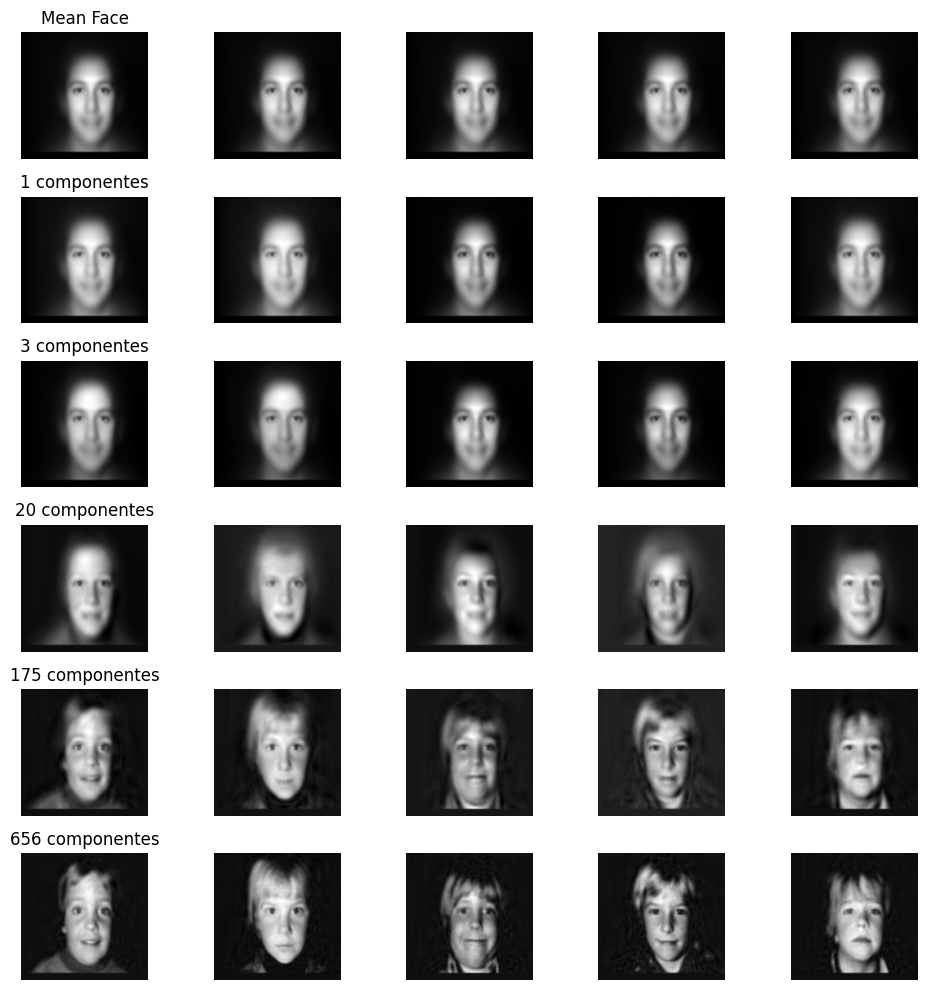

Componentes para 95% varianza: 175
Componentes para 99% varianza: 656


In [8]:
X_centered = X - mean_face  # Restar la mean face

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_centered)

# Determinar el número de componentes para 95% y 99% de la varianza
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
n_components_99 = np.argmax(cumsum_variance >= 0.99) + 1

# Función para reconstruir imágenes con un número específico de componentes
def reconstruct_image(n_components):
    pca_n = PCA(n_components=n_components)
    X_reduced = pca_n.fit_transform(X_centered)
    X_reconstructed = pca_n.inverse_transform(X_reduced) + mean_face
    return X_reconstructed

# Definir los diferentes números de componentes a probar
components_list = [1, 3, 20, n_components_95, n_components_99]
reconstructed_images = {n: reconstruct_image(n) for n in components_list}

# Visualizar imágenes
fig, axes = plt.subplots(len(components_list) + 1, 5, figsize=(10, 10))
axes[0, 0].set_title("Mean Face")
axes[0, 0].imshow(mean_face.reshape(128, 128), cmap='gray')
axes[0, 0].axis("off")

for i in range(5):
    axes[0, i].imshow(mean_face.reshape(128, 128), cmap='gray')
    axes[0, i].axis("off")

for row, n in enumerate(components_list, start=1):
    for col in range(5):
        axes[row, col].imshow(reconstructed_images[n][col].reshape(128, 128), cmap='gray')
        axes[row, col].axis("off")
        if col == 0:
            axes[row, col].set_title(f"{n} componentes")

plt.tight_layout()
plt.show()

print(f"Componentes para 95% varianza: {n_components_95}")
print(f"Componentes para 99% varianza: {n_components_99}")

### Testing

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline

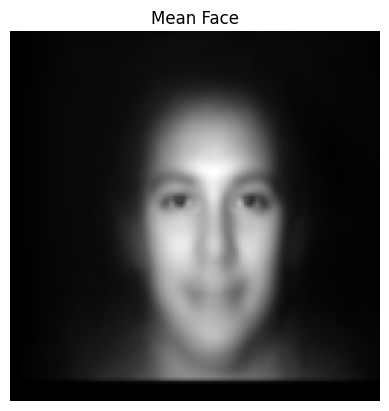

In [4]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def extract_files():
    """
    Extrae los archivos de imágenes desde un archivo ZIP local.
    """
    zip_path = r"C:\Users\MrDroky\Downloads\taller 1\src\Insumos\rawdata.zip"
    dest_path = os.path.join("data", "faces", "rawdata")

    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dest_path)

extract_files()

# Cargar el archivo example_pca.csv
csv_path = r"C:\Users\MrDroky\Downloads\taller 1\src\Insumos\example_pca.csv"
data_df = pd.read_csv(csv_path)

# Configuración de la carga de imágenes
d_name = os.path.join("data", "faces", "rawdata")
image_size = (128, 128)
X = []

# Verificar que la carpeta contiene archivos
if not os.path.exists(d_name) or not os.listdir(d_name):
    raise FileNotFoundError(f"No se encontraron imágenes en {d_name}")

# Obtener los nombres de archivo sin extensión
available_files = {os.path.splitext(f)[0]: f for f in os.listdir(d_name)}

# Leer imágenes según los IDs en el CSV
selected_ids = data_df['id'].astype(str).values

for img_id in selected_ids:
    if img_id in available_files:
        img_path = os.path.join(d_name, available_files[img_id])
        try:
            with open(img_path, "rb") as f:
                img_data = np.frombuffer(f.read(), dtype=np.uint8)
                if img_data.size == image_size[0] * image_size[1]:
                    img_array = img_data.reshape(image_size)
                    X.append(img_array.flatten())
                else:
                    print(f"Advertencia: El archivo {img_id} tiene un tamaño inesperado")
        except Exception as e:
            print(f"Error al procesar {img_id}: {e}")

if len(X) == 0:
    raise ValueError("No se cargaron imágenes correctamente. Verifique el archivo CSV y la carpeta de imágenes.")

X = np.array(X)

# Calcular la cara promedio
mean_face = np.mean(X, axis=0)

if mean_face.shape[0] != (image_size[0] * image_size[1]):
    raise ValueError(f"Dimensión incorrecta: {mean_face.shape}. Esperado: {(image_size[0] * image_size[1])}")

mean_face_img = mean_face.reshape(image_size)

# Visualizar la cara promedio
plt.imshow(mean_face_img, cmap='gray')
plt.title("Mean Face")
plt.axis("off")
plt.show()

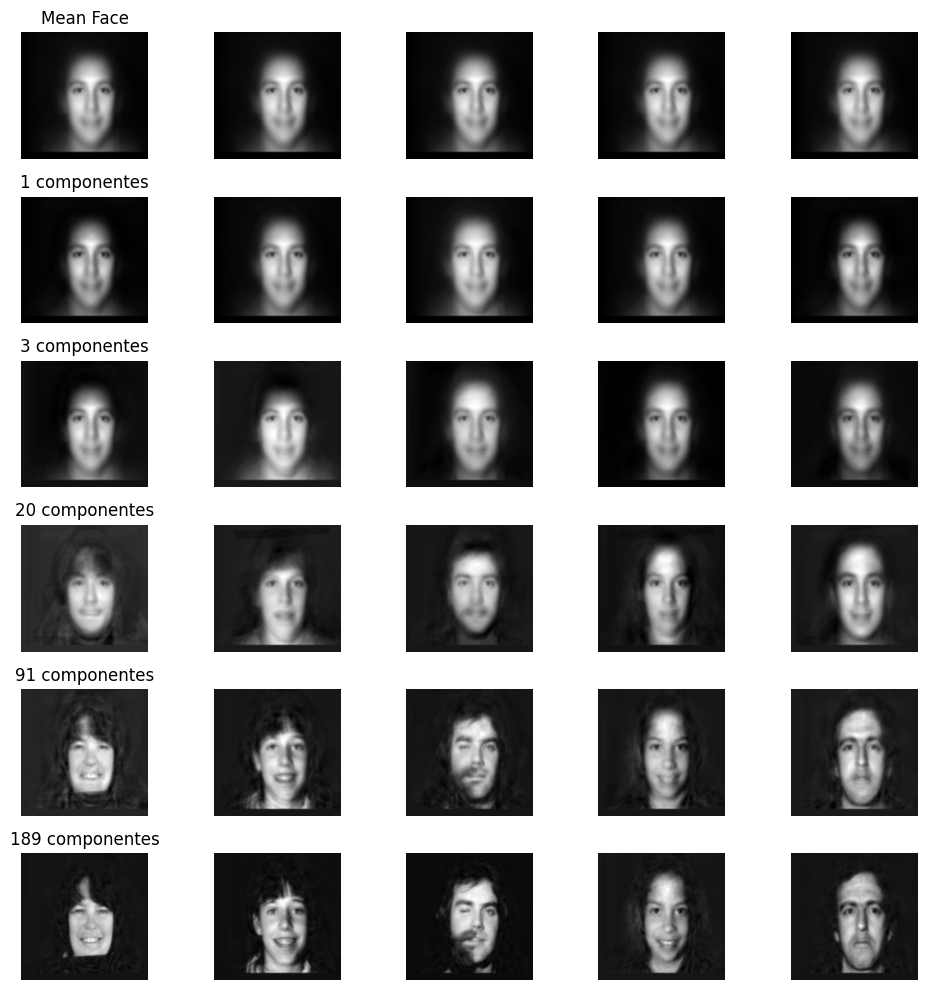

Componentes para 95% varianza: 91
Componentes para 99% varianza: 189


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Centrar los datos
X_centered = X - mean_face  # Restar la mean face

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_centered)

# Determinar el número de componentes para 95% y 99% de la varianza
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
n_components_99 = np.argmax(cumsum_variance >= 0.99) + 1

# Función para reconstruir imágenes con un número específico de componentes
def reconstruct_image(n_components):
    pca_n = PCA(n_components=n_components)
    X_reduced = pca_n.fit_transform(X_centered)
    X_reconstructed = pca_n.inverse_transform(X_reduced) + mean_face
    return X_reconstructed

# Definir los diferentes números de componentes a probar
components_list = [1, 3, 20, n_components_95, n_components_99]
reconstructed_images = {n: reconstruct_image(n) for n in components_list}

# Visualizar imágenes
fig, axes = plt.subplots(len(components_list) + 1, 5, figsize=(10, 10))
axes[0, 0].set_title("Mean Face")
axes[0, 0].imshow(mean_face.reshape(128, 128), cmap='gray')
axes[0, 0].axis("off")

for i in range(5):
    axes[0, i].imshow(mean_face.reshape(128, 128), cmap='gray')
    axes[0, i].axis("off")

for row, n in enumerate(components_list, start=1):
    for col in range(5):
        axes[row, col].imshow(reconstructed_images[n][col].reshape(128, 128), cmap='gray')
        axes[row, col].axis("off")
        if col == 0:
            axes[row, col].set_title(f"{n} componentes")

plt.tight_layout()
plt.show()

print(f"Componentes para 95% varianza: {n_components_95}")
print(f"Componentes para 99% varianza: {n_components_99}")